In [1]:
import twint
import datetime
import pandas as pd
import nest_asyncio
import pickle

nest_asyncio.apply()

parties = ["pisorgpl", "Porozumienie__", "SolidarnaPL", "platforma_org", "Nowoczesna", "Zieloni", "inicjatywaPL", 
            "KONFEDERACJA_", "RuchNarodowy", "Partia_KORWiN", "nowePSL","__Lewica", "partiarazem","kukiz15"]


def get_data_for_party(party):
    c = twint.Config()
    c.Username = party
    c.Since = '2020-01-01'
    #c.Retweets = True
    c.Store_csv = True
    c.Output = party + ".csv"
    twint.run.Search(c)
    
def get_comments_for_party(party):
    c = twint.Config()
    c.To = party
    c.Store_csv = True
    c.Tabs = True
    c.Since = '2020-07-01'
    c.Until = '2020-07-31'
    c.Output = party + "_comments.csv"
    c.Hide_output = True
    twint.run.Search(c)
for party in parties:
    #get_data_for_party(party)
    get_comments_for_party(party)


No more data. finished scraping!! is it though? because sometimes twitter lie.


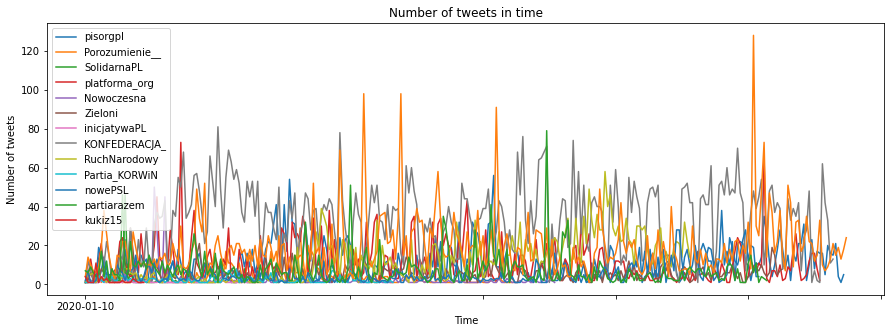

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
fig, ax = plt.subplots(figsize=(15, 5))

parties = ["pisorgpl", "Porozumienie__", "SolidarnaPL", "platforma_org", "Nowoczesna", "Zieloni", "inicjatywaPL", 
            "KONFEDERACJA_", "RuchNarodowy", "Partia_KORWiN", "nowePSL","__Lewica", "partiarazem","kukiz15"]
for party in parties:
    data = pd.read_csv(party + ".csv", usecols = ['date', 'id'], dtype = { "id": "string"})
    grp = data.groupby('date')['id'].count()
    ax = grp.plot(ax=ax, kind='line', label=party,
                      style='-', title='Number of tweets in time')
    plt.xlabel('Time')
    plt.ylabel('Number of tweets')
    plt.legend()

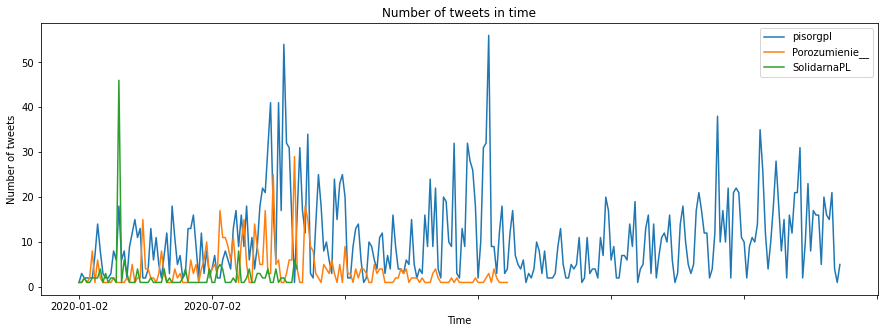

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
parties_coal = ['pisorgpl', 'Porozumienie__', 'SolidarnaPL']
for party in parties_coal:
    data = pd.read_csv(party + ".csv")
    grp = data.groupby('date')['id'].count()
    ax = grp.plot(ax=ax, kind='line', label=party,
                      style='-', title='Number of tweets in time')
    plt.xlabel('Time')
    plt.ylabel('Number of tweets')
    plt.legend()

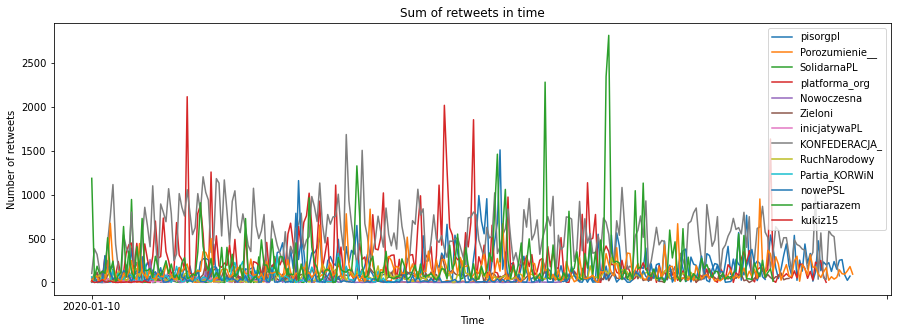

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
parties_coal = ['pisorgpl', 'Porozumienie__', 'SolidarnaPL']
for party in parties:
    data = pd.read_csv(party + ".csv")
    grp = data.groupby(['date'])['retweets_count'].sum()
    ax = grp.plot(ax=ax, kind='line', label=party,
                      style='-', title='Sum of retweets in time')
    plt.xlabel('Time')
    plt.ylabel('Number of retweets')
    plt.legend()

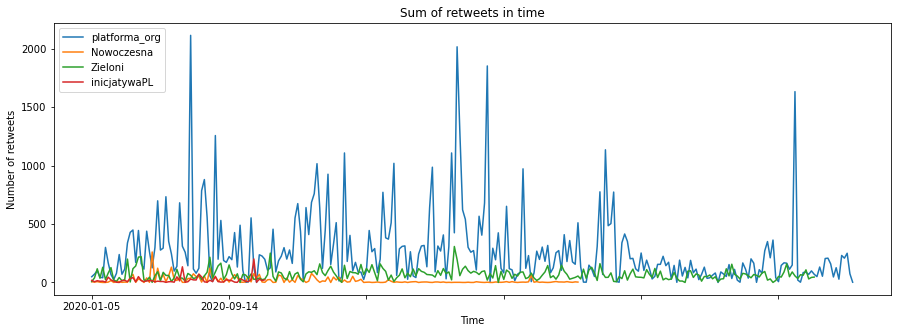

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
parties_coal = ['platforma_org', 'Nowoczesna', 'Zieloni', 'inicjatywaPL']
for party in parties_coal:
    data = pd.read_csv(party + ".csv")
    grp = data.groupby(['date'])['retweets_count'].sum()
    ax = grp.plot(ax=ax, kind='line', label=party,
                      style='-', title='Sum of retweets in time')
    plt.xlabel('Time')
    plt.ylabel('Number of retweets')
    plt.legend()

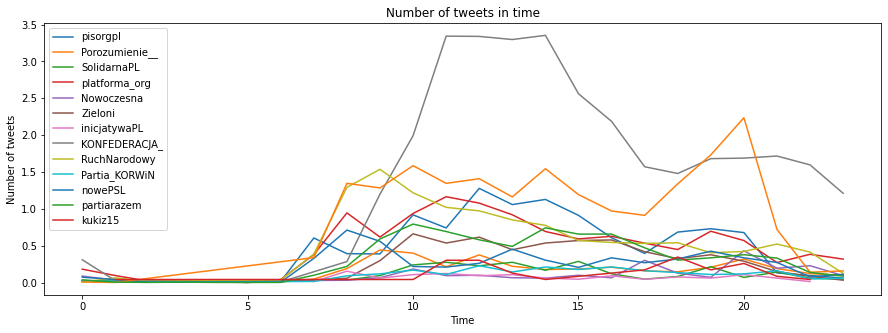

In [5]:
from datetime import *
fig, ax = plt.subplots(figsize=(15, 5))
for party in parties:
    data = pd.read_csv(party + ".csv")
    #data = data[(data.date >="2020-07-01") & (data.date <="2020-07-01")]
    time_df = [] 
    for index, row in data.iterrows():
        time_df.append(pd.to_datetime(row['time']).hour)
    data['hour'] = time_df
    grp = data.groupby(['hour'])['id'].count() / data.date.nunique()
    ax = grp.plot(ax=ax, kind='line', label=party,
                      style='-', title='Number of tweets in time')
    plt.xlabel('Time')
    plt.ylabel('Number of tweets')
    plt.legend()

pisorgpl
date
2020-07-13     2
2020-07-14    11
2020-07-15     3
2020-07-16     4
2020-07-17     4
2020-07-18     2
2020-07-19    11
Name: id, dtype: int64
Porozumienie__
date
2020-07-13    4
2020-07-14    2
2020-07-15    1
2020-07-16    1
2020-07-17    1
2020-07-19    1
Name: id, dtype: int64
SolidarnaPL
date
2020-07-15    1
Name: id, dtype: int64
platforma_org
date
2020-07-14    33
2020-07-15    15
2020-07-16    19
2020-07-17    26
2020-07-19     2
Name: id, dtype: int64
Nowoczesna
date
2020-07-13    2
2020-07-14    1
2020-07-15    2
2020-07-16    2
2020-07-17    1
2020-07-18    1
Name: id, dtype: int64
Zieloni
date
2020-07-13    2
2020-07-14    8
2020-07-15    3
2020-07-16    3
2020-07-17    2
Name: id, dtype: int64
inicjatywaPL
date
2020-07-18    1
Name: id, dtype: int64
KONFEDERACJA_
date
2020-07-13    42
2020-07-14    45
2020-07-15    40
2020-07-16    40
2020-07-17    37
2020-07-18    13
2020-07-19     7
Name: id, dtype: int64
RuchNarodowy
date
2020-07-13    20
2020-07-14    21
2

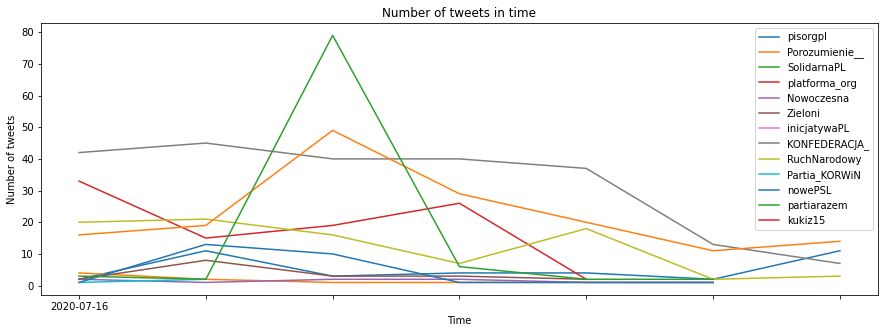

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
for party in parties:
    data = pd.read_csv(party + ".csv")
    data = data[(data.date >= "2020-07-13") & (data.date <= "2020-07-19")]
    #print(len(data))
    print(party)
    print(data.groupby(['date'])['id'].count())
    grp = data.groupby(['date'])['id'].count()
    ax = grp.plot(ax=ax, kind='line', label=party,
                      style='-', title='Number of tweets in time')
    plt.xlabel('Time')
    plt.ylabel('Number of tweets')
    plt.legend()
